In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving stackover_flow_survey.zip to stackover_flow_survey (2).zip
User uploaded file "stackover_flow_survey.zip" with length 9908290 bytes


In [ ]:
import os

In [ ]:
os.listdir()

['.config',
 'Data',
 'stackover_flow_survey (1).zip',
 'stackover_flow_survey.zip',
 'stackover_flow_survey (2).zip',
 'sample_data']

In [ ]:
import zipfile
source = 'stackover_flow_survey.zip'
dest = 'Data'

In [ ]:
with zipfile.ZipFile(source, 'r') as f:
  f.extractall(dest)

In [ ]:
os.listdir(dest)

['README_2020.txt',
 'so_survey_2020.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
raw_df = pd.read_csv('Data/survey_results_public.csv')
raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [ ]:
schema = pd.read_csv('Data/survey_results_schema.csv',index_col='Column').QuestionText

In [ ]:
schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [ ]:
schema['YearsCode']

'Including any education, how many years have you been coding in total?'

## Data Preparation and Cleaning

In [ ]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'ConvertedComp',
    'NEWEdImpt'
]


In [ ]:
len(selected_columns)

20

In [ ]:
df = raw_df[selected_columns].copy()
schema = schema[selected_columns].copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

## Data Types

In [ ]:
df1 = df.copy()

In [ ]:
df1.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [ ]:
df1.loc[df1['Age1stCode'] == 'Younger than 5 years', 'Age1stCode'] = '5'

In [ ]:
df1.loc[df1['Age1stCode'] == 'Older than 85', 'Age1stCode'] = '85'

In [ ]:
df1.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', '28', '38', '23', '27', '41', '24', '53', '26', '35',
       '32', '40', '33', '36', '54', '48', '56', '45', '44', '34', '85',
       '39', '51', '68', '50', '37', '47', '43', '52', '64', '55', '58',
       '49', '76', '72', '73', '83', '63'], dtype=object)

In [ ]:
df1['Age1stCode'] = pd.to_numeric(df1.Age1stCode, errors='coerce',downcast='integer')

In [ ]:
df1.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [ ]:
df1.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [ ]:
df1.loc[df1['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '1'
df1.loc[df1['YearsCode'] == 'More than 50 years', 'YearsCode'] = '50'
df1['YearsCode'] = pd.to_numeric(df1.YearsCode, errors='coerce', downcast='integer')


In [ ]:
df1.loc[df1['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = '1'
df1.loc[df1['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = '50'
df1['YearsCodePro'] = pd.to_numeric(df1.YearsCodePro, errors='coerce', downcast='integer')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  float64
 7   YearsCode               57684 non-null  float64
 8   YearsCodePro            46349 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [ ]:
df1.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45446.000000,57900.000000,57684.000000,46349.000000,41151.000000,3.475600e+04
mean,30.834111,15.417271,12.719697,8.537811,40.782174,1.037561e+05
std,9.585392,5.275178,9.691183,7.852753,17.816383,2.268853e+05
min,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.464800e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,44.000000,9.500000e+04
max,279.000000,85.000000,50.000000,50.000000,475.000000,2.000000e+06


In [ ]:
schema.WorkWeekHrs

'On average, how many hours per week do you work? Please enter a whole number in the box.'

In [ ]:
df1.drop(df1[df1.Age < 10].index, inplace=True)
df1.drop(df1[df1.Age > 100].index, inplace=True)
df1.drop(df1[df1.WorkWeekHrs > 100].index, inplace=True)

In [ ]:
df1.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45289.000000,57705.000000,57491.000000,46158.000000,40962.000000,3.459500e+04
mean,30.832123,15.416168,12.720182,8.539560,39.945394,1.037684e+05
std,9.503276,5.268529,9.691882,7.848962,10.322988,2.267373e+05
min,10.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.469000e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,43.000000,9.500000e+04
max,99.000000,85.000000,50.000000,50.000000,100.000000,2.000000e+06


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64266 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63877 non-null  object 
 1   Age                     45289 non-null  float64
 2   Gender                  50393 non-null  object 
 3   EdLevel                 57245 non-null  object 
 4   UndergradMajor          50835 non-null  object 
 5   Hobbyist                64221 non-null  object 
 6   Age1stCode              57705 non-null  float64
 7   YearsCode               57491 non-null  float64
 8   YearsCodePro            46158 non-null  float64
 9   LanguageWorkedWith      57203 non-null  object 
 10  LanguageDesireNextYear  53945 non-null  object 
 11  NEWLearn                55986 non-null  object 
 12  NEWStuck                54808 non-null  object 
 13  Employment              63660 non-null  object 
 14  DevType                 49185 non-null

In [ ]:
df1.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [ ]:
df1.where(~(df1.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [ ]:
df1.Gender.unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

In [ ]:
df1.isna()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,ConvertedComp,NEWEdImpt
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False
2,False,True,True,True,True,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,True,True,True,True,False
64457,False,True,True,True,True,False,True,True,True,False,False,True,True,False,True,True,True,True,True,True
64458,False,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64459,False,True,True,True,True,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True


In [ ]:
missing_perc = df1.isna().sum() * 100 / df1.shape[0]
missing_perc

Country                    1.089223
Age                       29.919398
Gender                    22.070768
EdLevel                   11.390160
UndergradMajor            21.291196
Hobbyist                   0.553948
Age1stCode                10.683721
YearsCode                 11.016712
YearsCodePro              28.509632
LanguageWorkedWith        11.463293
LanguageDesireNextYear    16.506395
NEWLearn                  13.335201
NEWStuck                  15.188436
Employment                 1.419102
DevType                   23.843090
WorkWeekHrs               36.555877
JobSat                    30.297513
JobFactors                23.897551
ConvertedComp             46.432017
NEWEdImpt                 25.227959
dtype: float64

In [ ]:
df = df1.copy()

## Exploratory Data Analysis

Country

In [ ]:
df.Country.nunique()

183

In [ ]:
top_countries = df.Country.value_counts().head(10)
top_countries

United States     12369
India              8355
United Kingdom     3880
Germany            3864
Canada             2174
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


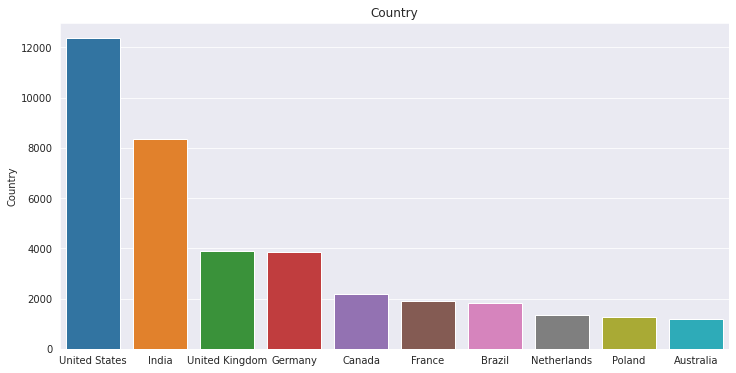

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Country')
sns.barplot(top_countries.index, top_countries)
plt.show()

Age

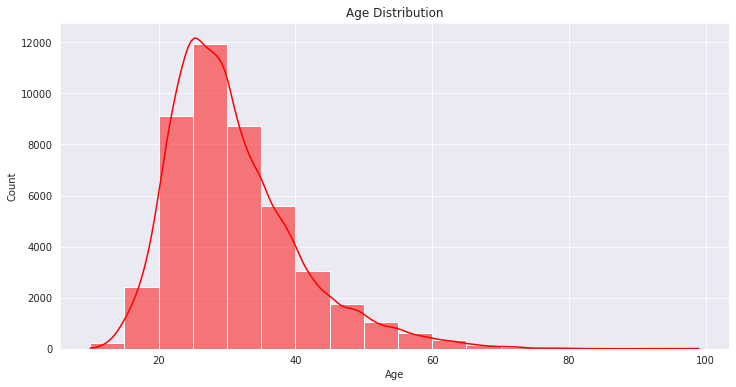

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Age Distribution')
sns.histplot(data=df, x='Age', bins=np.arange(10, 100, 5), kde=True, color='red')
plt.show()

#### Gender

In [ ]:
gender_counts = df.Gender.value_counts(dropna=True)
gender_counts

Man                                                  45864
Woman                                                 3834
Non-binary, genderqueer, or gender non-conforming      384
Name: Gender, dtype: int64

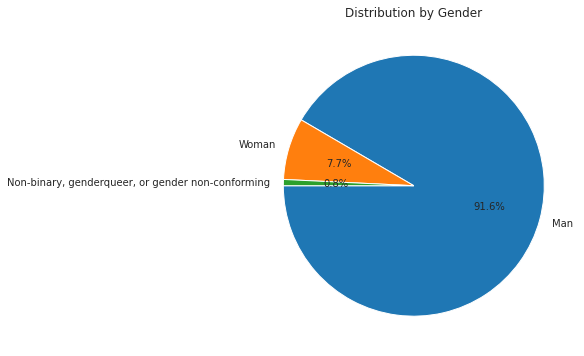

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Gender')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.show()

Education Level

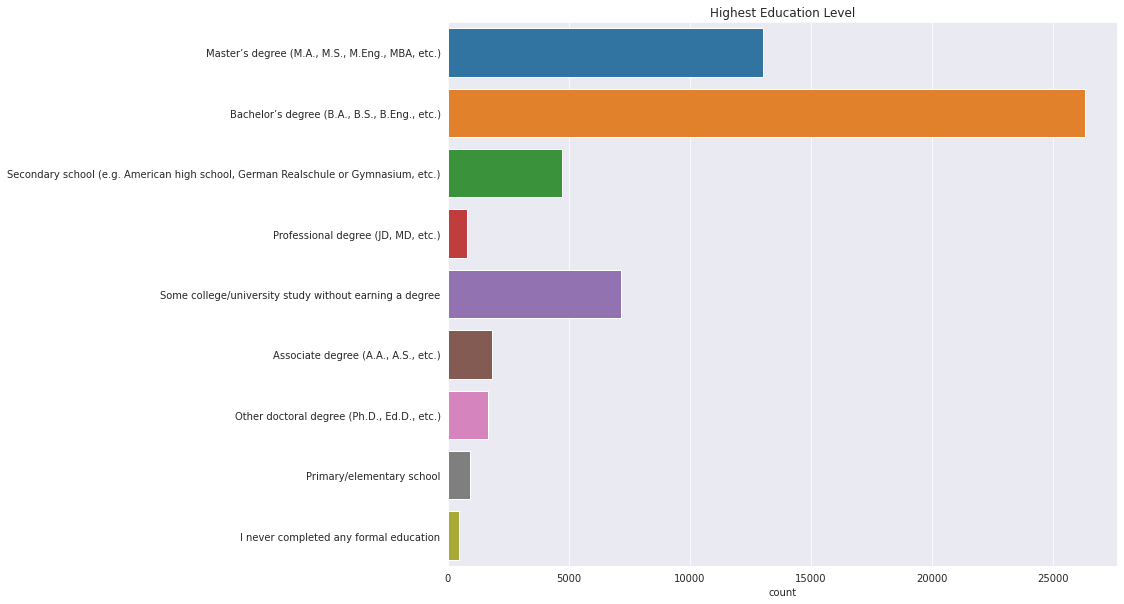

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(y=df.EdLevel)
plt.title('Highest Education Level')
plt.ylabel(None)
plt.show()

In [ ]:
(df.UndergradMajor.value_counts() / df.UndergradMajor.count()*100).to_frame()

,UndergradMajor
"Computer science, computer engineering, or software engineering",61.937805
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",9.354922
"Information systems, information technology, or system administration",7.980942
"A natural science (such as biology, chemistry, physics, etc.)",4.315679
Mathematics or statistics,3.627701
Web development or web design,3.501176
"A business discipline (such as accounting, finance, marketing, etc.)",2.702489
"A humanities discipline (such as literature, history, philosophy, etc.)",1.971018
"A social science (such as anthropology, psychology, political science, etc.)",1.822747
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",1.413518


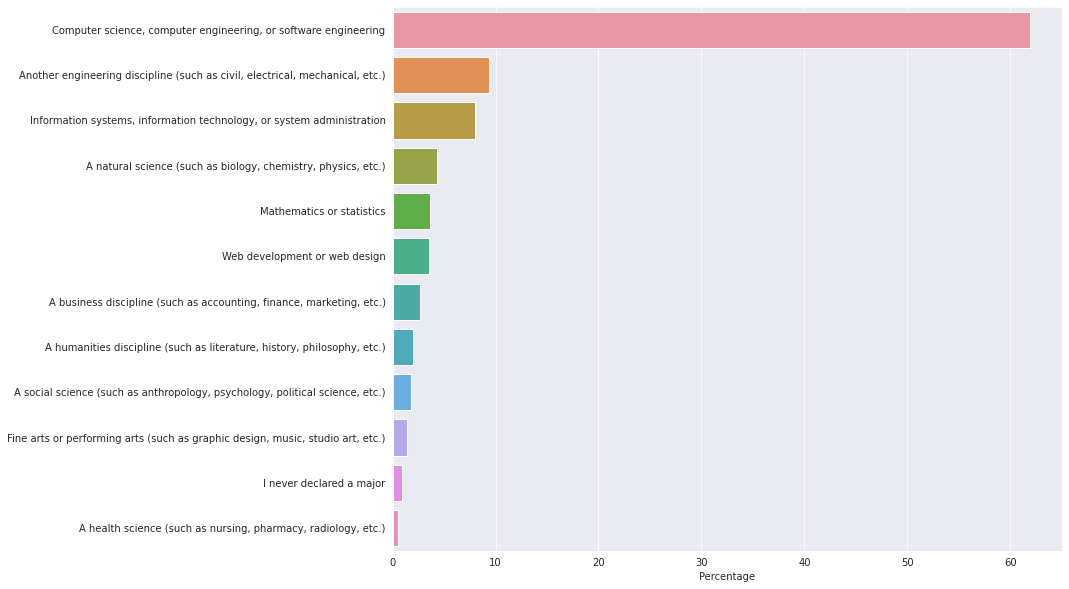

In [ ]:
cs_major = df.UndergradMajor.value_counts() / df.UndergradMajor.count()*100
plt.figure(figsize = (12, 10))
sns.barplot(x = cs_major, y = cs_major.index)
plt.ylabel(None)
plt.xlabel('Percentage')
plt.show()

In [ ]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [ ]:
(df.NEWEdImpt.value_counts() / df.NEWEdImpt.count() *100).to_frame()

,NEWEdImpt
Fairly important,26.175265
Very important,24.508355
Somewhat important,23.492810
Not at all important/not necessary,16.021892
Critically important,9.801677


## Employment

In [ ]:
schema.Employment

'Which of the following best describes your current employment status?'

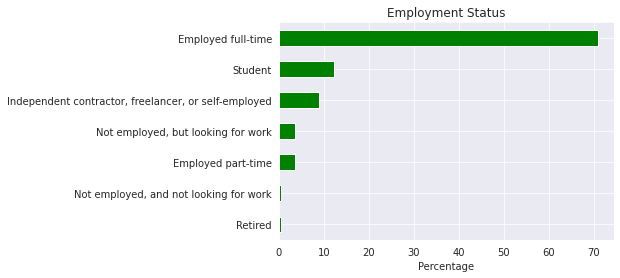

In [ ]:
(df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='green')
plt.title('Employment Status')
plt.xlabel('Percentage')
plt.show()

In [ ]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [ ]:
df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                  4395
Developer, back-end                                                                                                                                                                                                                                                                    3052
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                         2214
Developer, back-end;Developer, full-stack                                                                                                           

In [ ]:
def split_multicolumns(col_series):
  result_df = col_series.to_frame()
  options = []
  for idx, values in col_series[col_series.notnull()].iteritems():
    for option in values.split(';'):
      if not option in result_df.columns:
        options.append(option)
        result_df[option] = False
      result_df.at[idx, option] = True
  return result_df[options]

In [ ]:
dev_type_df = split_multicolumns(df.DevType)
dev_type_df.head()

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dev_type_df.sum().sort_values(ascending=False)

Developer, back-end                              26970
Developer, full-stack                            26892
Developer, front-end                             18110
Developer, desktop or enterprise applications    11670
Developer, mobile                                 9388
DevOps specialist                                 5908
Database administrator                            5650
Designer                                          5250
System administrator                              5174
Developer, embedded applications or devices       4692
Data or business analyst                          3965
Data scientist or machine learning specialist     3934
Developer, QA or test                             3886
Engineer, data                                    3692
Academic researcher                               3496
Educator                                          2889
Developer, game or graphics                       2746
Engineering manager                               2695
Product ma

In [ ]:
data_scientists = df.loc[df['DevType'] == 'Data scientist or machine learning specialist', 'EdLevel' ]
data_scientists

386             Other doctoral degree (Ph.D., Ed.D., etc.)
506             Other doctoral degree (Ph.D., Ed.D., etc.)
516        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
690        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
711        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
                               ...                        
63411    Some college/university study without earning ...
63494         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
63946         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
64220      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
64451      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
Name: EdLevel, Length: 366, dtype: object

In [ ]:
education_ds = (data_scientists.value_counts()*100/data_scientists.count()).sort_values(ascending=True)
education_ds

Primary/elementary school                                                              0.277008
I never completed any formal education                                                 0.554017
Associate degree (A.A., A.S., etc.)                                                    0.554017
Professional degree (JD, MD, etc.)                                                     0.831025
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1.939058
Some college/university study without earning a degree                                 2.216066
Other doctoral degree (Ph.D., Ed.D., etc.)                                            17.174515
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          31.024931
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       45.429363
Name: EdLevel, dtype: float64

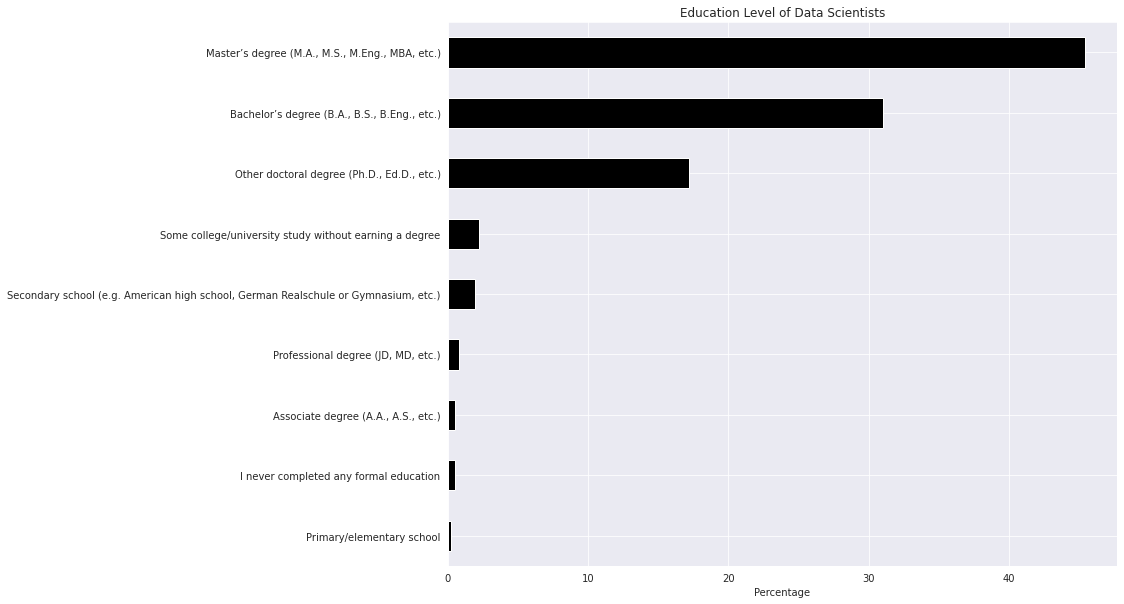

In [ ]:
plt.figure(figsize=(12, 10))
education_ds.sort_values(ascending=True).plot(kind='barh', color='black')
plt.title('Education Level of Data Scientists')
plt.xlabel('Percentage')
plt.show()

Q: What were the most popular languages in 2020

In [ ]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [ ]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [ ]:
languages_worked_df = split_multicolumns(df.LanguageWorkedWith)
languages_worked_df.head()

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,C,TypeScript,Bash/Shell/PowerShell,Kotlin,R,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
languages_worked_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64266 entries, 0 to 64460
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   C#                     64266 non-null  bool 
 1   HTML/CSS               64266 non-null  bool 
 2   JavaScript             64266 non-null  bool 
 3   Swift                  64266 non-null  bool 
 4   Objective-C            64266 non-null  bool 
 5   Python                 64266 non-null  bool 
 6   Ruby                   64266 non-null  bool 
 7   SQL                    64266 non-null  bool 
 8   Java                   64266 non-null  bool 
 9   PHP                    64266 non-null  bool 
 10  C                      64266 non-null  bool 
 11  TypeScript             64266 non-null  bool 
 12  Bash/Shell/PowerShell  64266 non-null  bool 
 13  Kotlin                 64266 non-null  bool 
 14  R                      64266 non-null  bool 
 15  VBA                    64266 non-nul

In [ ]:
languages_worked_perc = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_perc

JavaScript               59.888588
HTML/CSS                 55.797778
SQL                      48.442411
Python                   39.000405
Java                     35.616033
Bash/Shell/PowerShell    29.244079
C#                       27.800081
PHP                      23.117978
TypeScript               22.450440
C++                      21.113808
C                        19.229453
Go                        7.759935
Kotlin                    6.883889
Ruby                      6.230355
Assembly                  5.443003
VBA                       5.388541
Swift                     5.223602
R                         5.067999
Rust                      4.495379
Objective-C               3.602216
Dart                      3.511966
Scala                     3.149410
Perl                      2.755734
Haskell                   1.861015
Julia                     0.782684
dtype: float64

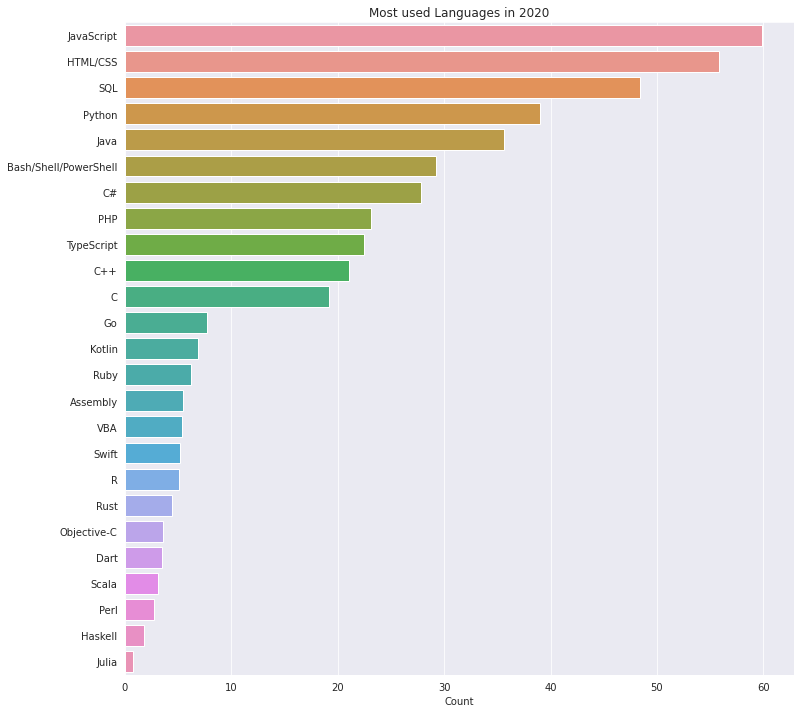

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_perc, y=languages_worked_perc.index)
plt.title('Most used Languages in 2020')
plt.xlabel('Count')
plt.show()

Q: What were the most-in demand languages in 2020

In [ ]:
languages_interested_df = split_multicolumns(df.LanguageDesireNextYear)
languages_interested_perc = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_perc

Python                   41.141506
JavaScript               40.421062
HTML/CSS                 32.026266
SQL                      30.803224
TypeScript               26.438552
C#                       21.054679
Java                     20.463387
Go                       19.430181
Bash/Shell/PowerShell    18.056204
Rust                     16.269878
C++                      15.014160
Kotlin                   14.752746
PHP                      10.940466
C                         9.354869
Swift                     8.688887
Dart                      7.302462
R                         6.569570
Ruby                      6.421747
Scala                     5.324744
Haskell                   4.594965
Assembly                  3.759375
Julia                     2.541001
Objective-C               2.334049
Perl                      1.759873
VBA                       1.610494
dtype: float64

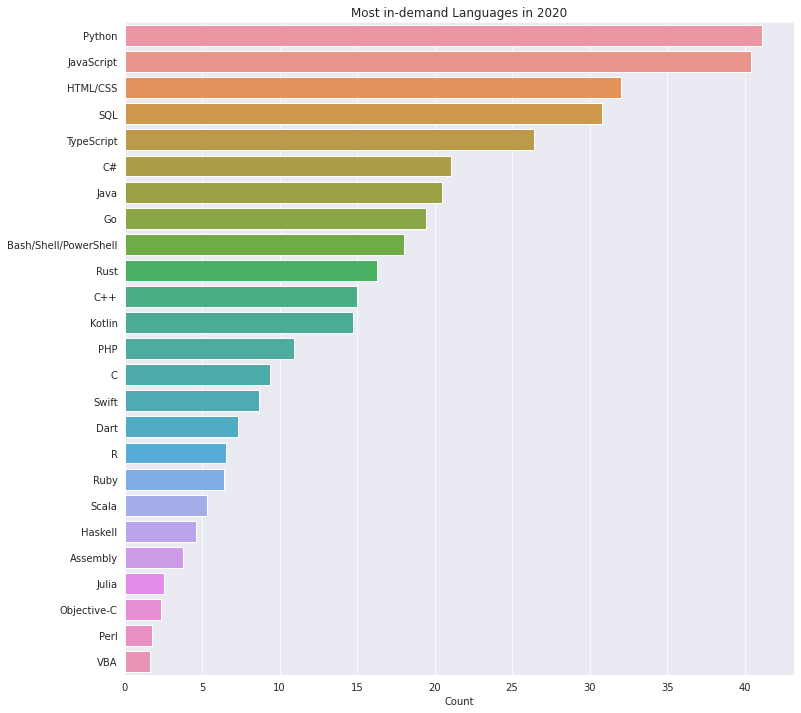

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_perc, y=languages_interested_perc.index)
plt.title('Most in-demand Languages in 2020')
plt.xlabel('Count')
plt.show()

Q: Most loved languages in 2020?

In [ ]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_perc = (languages_loved_df.sum() * 100 / languages_worked_df.sum()).sort_values(ascending=False)

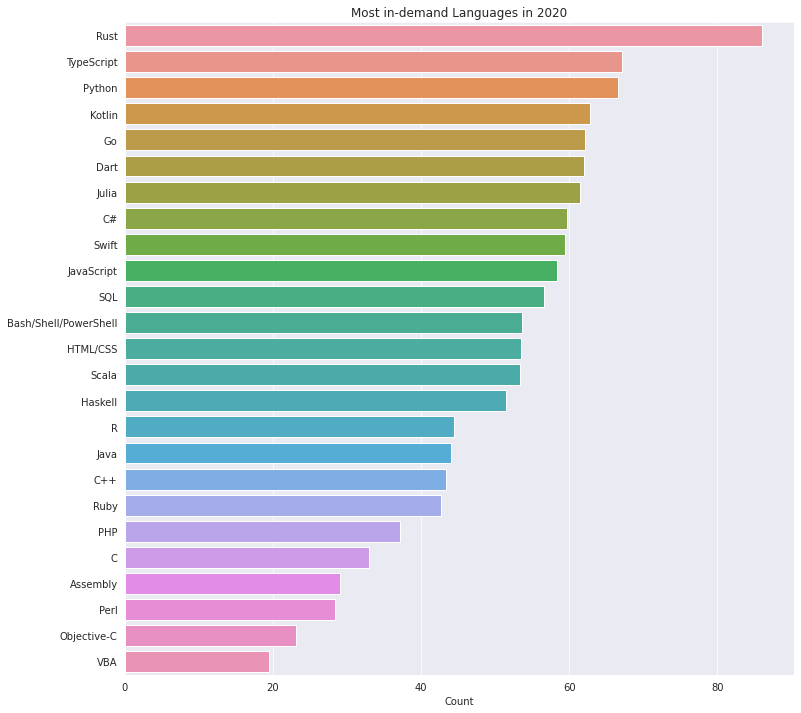

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_perc, y=languages_loved_perc.index)
plt.title('Most in-demand Languages in 2020')
plt.xlabel('Count')
plt.show()

Q: How many hours per week do respondant from different countries work for?

In [ ]:
countries_df = df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [ ]:
high_response_countries_df = countries_df.loc[df.Country.value_counts()>250]
high_response_countries_df

,WorkWeekHrs
Country,
Iran,43.800000
Israel,43.530806
China,42.150000
United States,41.783439
Greece,41.154297
South Africa,41.023460
Turkey,40.794183
New Zealand,40.457551
Belgium,40.444444


Q: How imp is it to start young to build a career in prog

In [ ]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [ ]:
schema.Hobbyist

'Do you code as a hobby?'

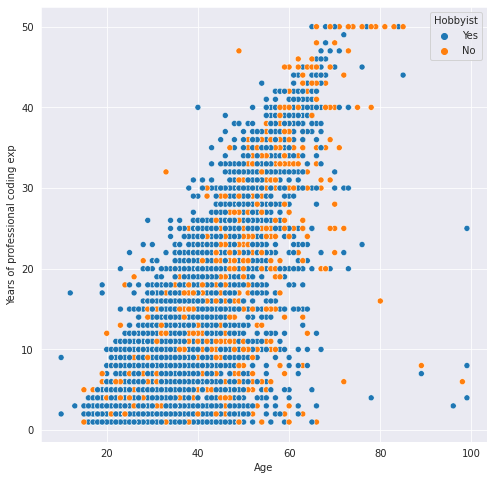

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=df)
plt.xlabel('Age')
plt.ylabel('Years of professional coding exp')
plt.show()


**Q: When did programmers start coding for the first time?**


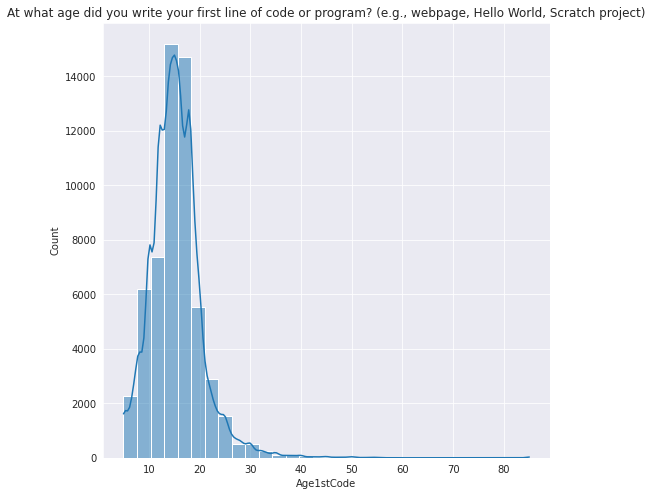

In [ ]:
plt.figure(figsize=(8,8))
plt.title(schema.Age1stCode)
sns.histplot(x=df.Age1stCode, bins=30, kde=True)

In [ ]:
df1 = df.copy()
df1['Country'] = np.where(df.Country == 'India', 'India', 'Rest of world')
df1.Country.value_counts()

Rest of world    55911
India             8355
Name: Country, dtype: int64

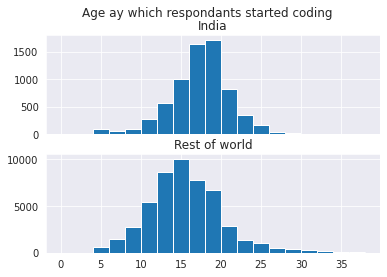

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
axes[0].set_title('India')
axes[0].hist(df1.loc[df1.Country == 'India', 'Age1stCode'],
             bins=np.arange(0, 40, 2))
axes[1].set_title('Rest of world')
axes[1].hist(df1.loc[df1.Country == 'Rest of world', 'Age1stCode'],
             bins=np.arange(0, 40, 2))
plt.suptitle('Age ay which respondants started coding')
plt.show()

Q: What are the average salaries?

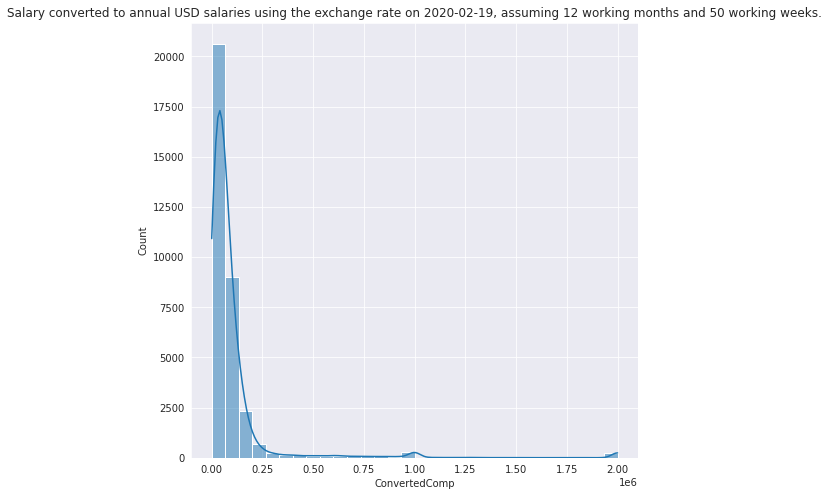

In [ ]:
plt.figure(figsize=(8,8))
plt.title(schema.ConvertedComp)
sns.histplot(x=df.ConvertedComp, bins=30, kde=True)
plt.show()

**Q: Salary Comparison** 

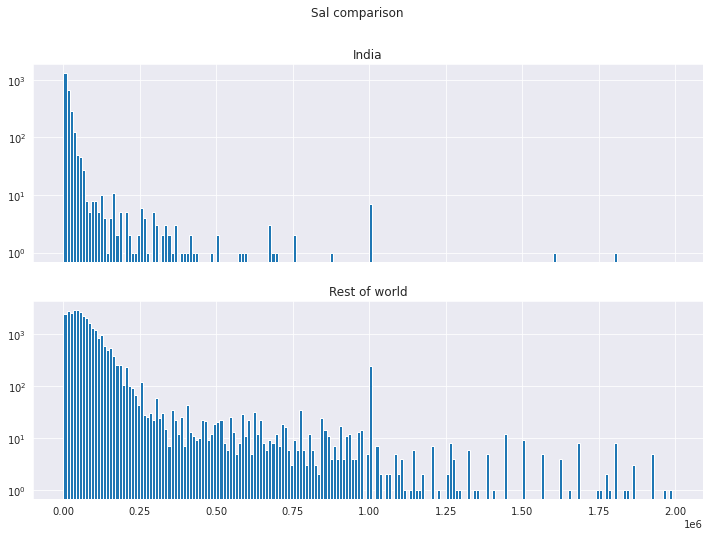

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
axes[0].set_title('India')
axes[0].hist(df1.loc[df1.Country == 'India', 'ConvertedComp'],
             bins=np.arange(0, 2000000, 10000),
             log=True)
axes[1].set_title('Rest of world')
axes[1].hist(df1.loc[df1.Country == 'Rest of world', 'ConvertedComp'],
             bins=np.arange(0, 2000000, 10000),
             log=True)
plt.suptitle('Sal comparison')
plt.show()